In [1]:
# -*- coding: utf-8 -*-
# 获取文件路径
import os
path = os.getcwd()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3-1 餐饮销额数据异常值检测

In [3]:
catering_sale = path + '/data/catering_sale.xls'
data1 = pd.read_excel(catering_sale, index_col = u'日期')    # 读取数据，指定“日期”为索引

print('显示数据信息：')
data1.info()
print('显示数据分布：')
data1.describe()

显示数据信息：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2015-03-01 to 2014-08-02
Data columns (total 1 columns):
销量    200 non-null float64
dtypes: float64(1)
memory usage: 3.1 KB
显示数据分布：


,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [4]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']    # 用以正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用以正常显示负号

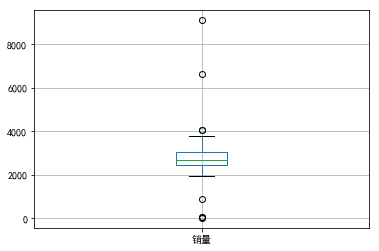

In [5]:
# 建立图像
plt.figure()
# 画箱线图
p = data1.boxplot(return_type = 'dict')
x = p['fliers'][0].get_xdata()           # 'flies'即为异常值标签
y = p['fliers'][0].get_ydata().sort()    # y值从小到大排序
plt.show()

3-2 餐饮销量数据统计分析

In [6]:
# 过滤异常数据
data2 = data1[(data1[u'销量'] > 400) & (data1[u'销量'] < 5000)]
statistics = data2.describe()

statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min']  # 极差
statistics.loc['var'] = statistics.loc['std'] / statistics.loc['mean']   # 变异系数
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%']    # 四分位数间距
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


3-3 菜品盈利帕累托

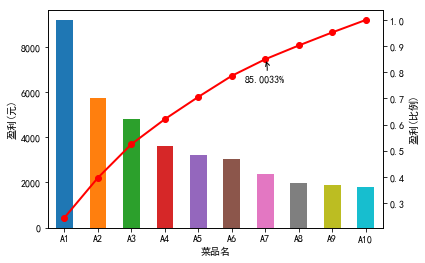

In [7]:
dish_profit = path + '/data/catering_dish_profit.xls'
data3 = pd.read_excel(dish_profit, index_col = u'菜品名')
data3 = data3[u'盈利'].copy()
data3.sort_values(ascending = False)

plt.rcParams['font.sans-serif'] = ['SimHei']    # 用以正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用以正常显示负号

plt.figure()
data3.plot(kind = 'bar')
plt.ylabel(u'盈利(元)')
p = 1.0 * data3.cumsum() / data3.sum()
p.plot(color = 'r', secondary_y = True, style = '-o', linewidth = 2)
plt.annotate(
    format(p[6], '.4%'),
    xy = (6, p[6]),
    xytext = (6 * 0.9, p[6] * 0.9),
    arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad=.2")
)
plt.ylabel(u'盈利(比例)')
plt.show()

3-4 餐饮销量数据相关性分析

In [8]:
catering_sale = path + '/data/catering_sale_all.xls'
data = pd.read_excel(catering_sale, index_col = u'日期')

# 相关系数矩阵
data.corr()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [9]:
data.corr()[u'百合酱蒸凤爪']

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [10]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺'])

0.009205803051836475